In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
MFCCs = np.load("../preprocessing/MFCCs/MFCC.npy")
MFCCs = (MFCCs - np.nanmean(MFCCs))/np.nanstd(MFCCs)

In [3]:
info_songs = pd.read_csv("../data/Info/info.csv")
label_songs = pd.read_csv("../preprocessing/labels.csv")

In [4]:
select_label = "genre"

if select_label == "genre":
    labels = label_songs[select_label].map({"classical":0, "electronic":1, "pop":2, "rock":3})
labels = labels.to_numpy()

In [5]:
length_songs = pd.DataFrame(info_songs["Track ID"])
length_songs["Song length"] = info_songs["Duration"]*10
length_songs["Song length"] = length_songs["Song length"].astype(int)
length_songs

,Track ID,Song length
0,1,600
1,10,600
2,100,600
3,11,600
4,12,600
...,...,...
395,395,600
396,396,600
397,397,600
398,398,600


In [6]:
n_data = len(length_songs)
idx = np.random.permutation(n_data)
length_songs = length_songs.reindex(idx)["Song length"].to_numpy()
MFCCs = MFCCs[idx, :, :]
labels = labels[idx]

MFCCs_raw = MFCCs[:]
labels_raw = labels[:]

In [7]:
import tensorflow as tf

In [8]:
fraction_validation = 0.25
n_test = int(fraction_validation*len(labels))
n_train = len(labels) - n_test

train_features, train_labels, train_length = MFCCs[:n_train], labels[:n_train], length_songs[:n_train]
validation_features, validation_labels, validation_length = MFCCs[n_train:], labels[n_train:], length_songs[n_train:]

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_features, validation_labels))

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K

#sample_size = (20, 50, 1)
sample_size = (20, 100, 1)

drop_out_rate = 0.2

# very simple keras Sequential model
input_tensor = Input(sample_size)
x = layers.Conv2D(16, (1, 10), padding="valid", activation="relu", strides=1)(input_tensor)
x = layers.Conv2D(32, (1, 5), padding="valid", activation="relu", strides=1)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(4, activation="softmax")(x)

model_1 = tf.keras.Model(input_tensor, output_tensor)

In [11]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 100, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 91, 16)        176       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 87, 32)        2592      
_________________________________________________________________
dropout (Dropout)            (None, 20, 87, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 43, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13760)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                688050

In [12]:
sample_size = (20, 50, 1)

drop_out_rate = 0.4

# very simple keras Sequential model
input_tensor = Input(sample_size)
x = layers.Conv2D(8, (3, 3), padding="valid", activation="relu", strides=1)(input_tensor)
x = layers.Conv2D(16, (3, 3), padding="valid", activation="relu", strides=1)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)
x = layers.Conv2D(8, (3, 3), padding="valid", activation="relu", strides=1)(x)
x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(4, activation="softmax")(x)

model_1 = tf.keras.Model(input_tensor, output_tensor)
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 50, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 48, 8)         80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 46, 16)        1168      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 46, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 22, 16)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 20, 8)          1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 9, 8)           0   

In [13]:
input_tensor = Input(sample_size)
x = layers.Conv2D(16, (3, 3), padding="valid", activation="relu", strides=1)(input_tensor)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(32, (3, 3), padding="valid", activation="relu", strides=1)(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Conv2D(32, (1,2), padding="valid", activation="relu", strides=1)(x)
x = layers.MaxPooling2D(pool_size=(1,2))(x)

x = layers.Conv2D(16, (2,2), padding="valid", activation="relu", strides=1)(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Flatten()(x)

x = layers.Dropout(2*drop_out_rate)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(4, activation="softmax")(x)

model_3 = tf.keras.Model(input_tensor, output_tensor)
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20, 50, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 48, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 24, 16)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 22, 32)         4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 11, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 10, 32)         2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 5, 32)          0   

In [14]:
model = model_1
#model = model_2
#model = model_3

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
def slice_accordingly(input_tensor, labels, size=sample_size):

    input_shape = (tf.shape(input_tensor).numpy())
    
    input_shape[1], input_shape[2] = size[0], size[1]
    size = input_shape
    
    sliced_tensor = tf.image.random_crop(input_tensor, size)
    
    nan_values, idx = tf.unique(tf.gather(tf.where(tf.math.is_nan(sliced_tensor)), 0, axis=1))
    nan_values = nan_values.numpy()
  
    msk = np.zeros((input_shape[0]), dtype=np.bool)
    msk[nan_values] = True
    msk = ~msk

    sliced_tensor = tf.boolean_mask(sliced_tensor, msk , axis=0)
    labels = tf.boolean_mask(labels , msk, axis=0)
    
    return sliced_tensor, labels

In [16]:
n_epochs = 100
batch_size = 50

history_df = pd.DataFrame()

for epoch in range(n_epochs):
    print("Epoch", epoch)
    train_ds = train_dataset.shuffle(n_train).batch(batch_size)
    val_ds = validation_dataset.shuffle(n_test).batch(n_test)
    
    x_val, y_val = next(iter(val_ds))
    x_val, y_val = slice_accordingly(x_val, y_val)
    
    for features, labels in train_ds:
        features, labels = slice_accordingly(features, labels)
        
        history = model.fit(features, labels,
                           validation_data=(x_val, y_val),verbose=1)
        predictions = model.predict(features)

        history = pd.DataFrame(history.history)
        history_df = history_df.append(history)

Epoch 0
2/2 [==============================] - 0s 96ms/step - loss: 1.3918 - accuracy: 0.2400 - val_loss: 1.3777 - val_accuracy: 0.2300
Epoch 1
2/2 [==============================] - 0s 106ms/step - loss: 1.3664 - accuracy: 0.3061 - val_loss: 1.3716 - val_accuracy: 0.3535
Epoch 2
2/2 [==============================] - 0s 80ms/step - loss: 1.3450 - accuracy: 0.3000 - val_loss: 1.3450 - val_accuracy: 0.4949
Epoch 3
2/2 [==============================] - 0s 101ms/step - loss: 1.3441 - accuracy: 0.3265 - val_loss: 1.3313 - val_accuracy: 0.3800
Epoch 4
2/2 [==============================] - 0s 86ms/step - loss: 1.2504 - accuracy: 0.5000 - val_loss: 1.3016 - val_accuracy: 0.5100
Epoch 5
2/2 [==============================] - 0s 106ms/step - loss: 1.2006 - accuracy: 0.4200 - val_loss: 1.2183 - val_accuracy: 0.6061
Epoch 6
2/2 [==============================] - 0s 92ms/step - loss: 1.0971 - accuracy: 0.5102 - val_loss: 1.1960 - val_accuracy: 0.5960
Epoch 7
2/2 [==============================] 

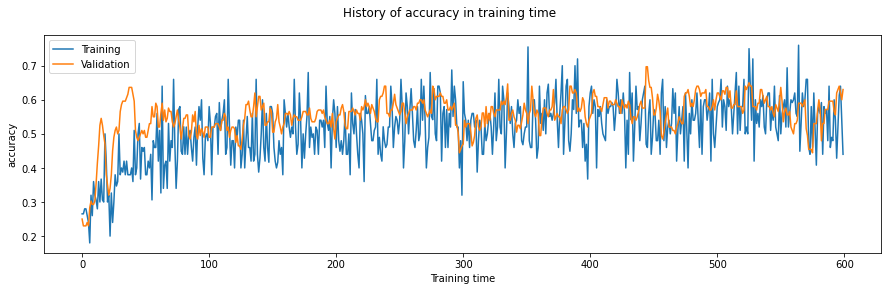

In [17]:
%matplotlib inline

metric = "accuracy" #Choose between 'loss', 'MSE', 'cosine similarity', 'r2'

import matplotlib.pyplot as plt
try: history_df = history_df.reset_index()
except: pass

metrics_dict = {"loss": ["loss", "val_loss"], "accuracy": ["accuracy", "val_accuracy"]}

fig, ax = plt.subplots(figsize=(15,4),nrows=1, ncols=1)
ax.set_ylabel(f"{metric}")
ax.set_xlabel("Training time")
fig.suptitle(f"History of {metric} in training time")

train_plot = history_df.plot(y=metrics_dict[metric][0], use_index=True, ax=ax, label="Training")
val_plot = history_df.plot(y=metrics_dict[metric][1], use_index=True, ax=ax, label="Validation")

plt.show()

# "Cross-validation"

In [18]:
from sklearn.model_selection import KFold


n_splits = 5
kf = KFold(n_splits=n_splits)

predictions_and_labels = {}


count = 0


for train_index, test_index in kf.split(MFCCs_raw):
    
    print(f"Training K-fold {1+count} of {n_splits}")

    train_features, train_labels = MFCCs_raw[train_index], labels_raw[train_index]
    validation_features, validation_labels = MFCCs_raw[test_index], labels_raw[test_index]

    train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
    validation_dataset = tf.data.Dataset.from_tensor_slices((validation_features, validation_labels))
    
    sample_size = (20, 50, 1)

    drop_out_rate = 0.4

    # very simple keras Sequential model
    input_tensor = Input(sample_size)
    x = layers.Conv2D(8, (3, 3), padding="valid", activation="relu", strides=1)(input_tensor)
    x = layers.Conv2D(16, (3, 3), padding="valid", activation="relu", strides=1)(x)
    x = layers.Dropout(drop_out_rate)(x)
    x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)
    x = layers.Conv2D(8, (3, 3), padding="valid", activation="relu", strides=1)(x)
    x = layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(drop_out_rate)(x)
    output_tensor = layers.Dense(4, activation="softmax")(x)

    model = tf.keras.Model(input_tensor, output_tensor)

    model.compile(optimizer="adam",
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    n_epochs = 100
    batch_size = 50
    
    for epoch in range(n_epochs):
        train_ds = train_dataset.shuffle(n_train).batch(batch_size)
        for features, labels in train_ds:
            features, labels = slice_accordingly(features, labels)
            model.fit(features, labels, verbose=0)
            
    x_val, y_val = next(iter(val_ds))
    x_val, y_val = slice_accordingly(x_val, y_val)
    
    pred_ = model.predict(x_val)
    
    predictions_and_labels[count] = [pred_, y_val]
    count = count+1

Training K-fold 1 of 5
Training K-fold 2 of 5
Training K-fold 3 of 5
Training K-fold 4 of 5
Training K-fold 5 of 5


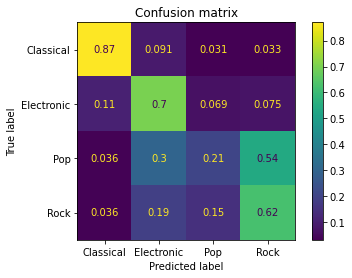

The accuracy is approximately: 0.60 +- 0.06%


In [20]:
%matplotlib inline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import IPython

cm = np.zeros((4,4))
accuracies = []

for i in range(max(predictions_and_labels.keys())+1):
    y_pred = predictions_and_labels[i][0]
    y_pred = tf.argmax(y_pred,1)
    y_true = predictions_and_labels[i][1]
    
    conf_mat = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
    
    accuracies.append(np.sum(np.eye(4)*conf_mat)/np.sum(conf_mat))
    
    cm += conf_mat

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = cm / cm.astype(np.float).sum(axis=1)

ls = ["Classical", "Electronic", "Pop", "Rock"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
disp.plot(include_values=True, colorbar=True, cmap="viridis")
plt.title("Confusion matrix")
plt.show()

print(f'The accuracy is approximately: {np.mean(accuracies):.2f} +- {np.std(accuracies):.2f}%')